In [1]:
import pandas as pd
import numpy as np
import os
from re import sub
import re
import tqdm
import pytils.translit
from collections import OrderedDict
import json
os.chdir('/home/andreybondar/Desktop/Scrapping/fio_parsing/')

In [2]:
df_examples = pd.read_excel('instagram_.xlsx')
#df_examples = df_examples[1000:]

In [5]:
def prepare_sentence(sentence):
    
    text = sub(r'\s+', ' ', sentence).strip().lower()
    
    def replace_str_index(text,index=0,replacement=''):
        return '%s%s%s'%(text[:index],replacement,text[index+1:])
    
    #replace "й"
    try:
        index_ = text.index('й'[1]) - 1
        text = text.replace('й'[1], '')
        text = replace_str_index(text, index_, 'й')
    except:
        pass

    #replace "ё"
    try:
        index_ = text.index('ё'[1]) - 1
        text = text.replace('ё'[1], '')
        text = replace_str_index(text, index_, 'ё')
    except:
        pass
    
    text = re.sub('[ó]', 'о', text)
    #text = re.sub('[^а-яА-ЯA-Za-z0-9 ]+', ' ', text)
    text = re.sub(r'[+\(]?[0-9][0-9 .\-\(\)]{4,15}[0-9]', ' ', text)
    text = re.sub(r'[^А-Яа-яA-Za-z ]+', ' ', text)
    text = sub(r'\s+', ' ', text).strip().lower() 
    text = pytils.translit.detranslify(text)
    text = sub('[ё]', 'е', text)
    
    return text

prepared_for_ner = df_examples['full_text'].apply(lambda text: prepare_sentence(text))

In [6]:
prepared_for_ner

0        карпова гинеколог гинеколог репродуктолог эко ...
1        аубакиров булат булат аубакиров оберегай свою ...
2        др алладемидова кардиолог терапевт москва науч...
3        др кожевникова м кожевникова мария неочередной...
4        мастердент стоматология мастердент абубакарова...
                               ...                        
12414    областнаиа стоматологииа областная стоматологи...
12415    доcтор лунг врач ростов на дону анна сергеевна...
12416    стомалуx анапа стоматология в анапе стомалюкс ...
12417    др тамаранм мальцева тамара николаевна врач ак...
12418    cлиниcс ссму клиники сибгму мц профессор первы...
Name: full_text, Length: 12419, dtype: object

In [7]:
k = 1000
print(prepared_for_ner[k])
print(df_examples.full_text[k])

тапинг дв тейпирование дальнии восток ковалева мария александровна глав врач мц далинь обучающие семинары по мед реабилитации терапевтическому тейпированию хттпс фс щоол ру сн
taping_dv Тейпирование Дальний Восток. Ковалева Мария Александровна 👩‍⚕️ Глав.врач МЦ "Далинь" 📲8-914-546-01-11. 📚 Обучающие семинары по мед. реабилитации, терапевтическому тейпированию. - https://fs-school.ru/sn


In [8]:
df_per_org_loc = pd.read_excel('fio_lpu_adr_from_base_0.xlsx')
df_per_org_loc = df_per_org_loc.fillna('')

In [9]:
PER_text = ' '.join(df_per_org_loc['PER'].to_list()).strip().lower()

PER_text = re.sub(r'[^.А-Яа-яA-Za-z ]+', ' ', PER_text)
PER_text = pytils.translit.detranslify(PER_text)

tokenizer = re.split(' ',  PER_text) * 5
tokenizer = [i for i in tokenizer if i != '']

PER_d = {}
for i in tokenizer:
    PER_d[i] = PER_d.get(i, 0) + 1
    
joined_instagram = ' '.join(prepared_for_ner)
list_of_words_instagram = joined_instagram.split(' ')

INST_d = {}
for i in list_of_words_instagram:
    INST_d[i] = INST_d.get(i, 0) + 1

In [102]:
#i += 1
i = 127
try:
    print(PER_d[list_of_words_instagram[i]])
except:
    print('0')
print(INST_d[list_of_words_instagram[i]])
print(list_of_words_instagram[i])

40
2362
на


In [10]:
words_to_investigate = []

for i in list_of_words_instagram:
    try:
        per_count = PER_d[i]
    except:
        per_count = 0
    
    inst_count = INST_d[i]
    
    if per_count > inst_count:
        words_to_investigate.append((per_count, inst_count, i))
        
words_to_investigate = list(set(words_to_investigate))
words_to_investigate_1 = sorted(words_to_investigate)
words_to_investigate_1 = [z for x,y,z in words_to_investigate]

In [11]:
pd.DataFrame(words_to_investigate, columns=['per_count', 'inst_count', 'word']).to_excel('per_count.xlsx')

In [12]:
len(words_to_investigate_1)

7338

In [10]:
## location

In [13]:
df_LOC = pd.read_excel('fio_lpu_adr_from_base_1.xlsx', 'LOC_splitted')
df_LOC = df_LOC.fillna('')

In [14]:
LOC_text = ' '.join(df_LOC['LOC'].to_list()).strip().lower()

LOC_text = re.sub(r'[^А-Яа-яA-Za-z ]+', ' ', LOC_text)
LOC_text = pytils.translit.detranslify(LOC_text)

tokenizer = re.split(' ',  LOC_text) #* 5
tokenizer = [i for i in tokenizer if i != '']

LOC_d = {}
for i in tokenizer:
    LOC_d[i] = LOC_d.get(i, 0) + 1
    
joined_instagram = ' '.join(prepared_for_ner)
list_of_words_instagram = joined_instagram.split(' ')

INST_d = {}
for i in list_of_words_instagram:
    INST_d[i] = INST_d.get(i, 0) + 1

In [180]:
i += 1
#i = 0
try:
    print(LOC_d[list_of_words_instagram[i]])
except:
    print('0')
print(INST_d[list_of_words_instagram[i]])
print(list_of_words_instagram[i])

0
7
гипноз


In [15]:
words_to_investigate = []

for i in list_of_words_instagram:
    try:
        loc_count = LOC_d[i]
    except:
        loc_count = 0
    
    inst_count = INST_d[i]
    
    if loc_count > inst_count:
        words_to_investigate.append((loc_count, inst_count, i))
        
words_to_investigate = list(set(words_to_investigate))
words_to_investigate_2 = sorted(words_to_investigate, reverse = True)

In [186]:
words_to_investigate_1 = set([z for x,y,z in words_to_investigate if x < 70])
df_LOC['prepared_loc'] = df_LOC['LOC'].apply(lambda text: set(prepare_sentence(text).split(' ')))
df_LOC['True/False'] = df_LOC['prepared_loc'].apply(lambda x: True if (x & words_to_investigate_1 != set()) else False)
df_LOC.to_excel('true_false.xlsx')

In [17]:
pd.DataFrame(words_to_investigate, columns=['loc_count', 'inst_count', 'word']).to_excel('loc_count.xlsx')

In [18]:
words_to_investigate_2 = [z for x,y,z in words_to_investigate if x > 200]

In [19]:
# Organisation
df_ORG = pd.read_excel('fio_lpu_adr_from_base_1.xlsx', 'ORG')

In [20]:
ORG_text = ' '.join(df_ORG['ORG'].to_list()).strip().lower()

ORG_text = re.sub(r'[^А-Яа-яA-Za-z ]+', ' ', ORG_text)
ORG_text = pytils.translit.detranslify(ORG_text)

tokenizer = re.split(' ',  ORG_text) #* 5
tokenizer = [i for i in tokenizer if i != '']

ORG_d = {}
for i in tokenizer:
    ORG_d[i] = ORG_d.get(i, 0) + 1
    
joined_instagram = ' '.join(prepared_for_ner)
list_of_words_instagram = joined_instagram.split(' ')

INST_d = {}
for i in list_of_words_instagram:
    INST_d[i] = INST_d.get(i, 0) + 1

In [21]:
words_to_investigate = []

for i in list_of_words_instagram:
    try:
        org_count = ORG_d[i]
    except:
        org_count = 0
    
    inst_count = INST_d[i]
    
    if org_count > inst_count:
        words_to_investigate.append((org_count, inst_count, i))
        
words_to_investigate = list(set(words_to_investigate))
words_to_investigate_3 = sorted(words_to_investigate, reverse = True)

In [22]:
pd.DataFrame(words_to_investigate, columns=['org_count', 'inst_count', 'word']).to_excel('org_count.xlsx')

In [23]:
words_to_investigate_3 = [z for x,y,z in words_to_investigate if x > 40]

In [24]:
sentences_inst = [i.split(' ') for i in prepared_for_ner]

In [25]:
len(words_to_investigate_1), len(words_to_investigate_2), len(words_to_investigate_3)

(7338, 300, 407)

In [25]:
len(words_to_investigate_1), len(words_to_investigate_2), len(words_to_investigate_3)

(6904, 135, 305)

In [26]:
words_to_investigate = set(words_to_investigate_1 + words_to_investigate_2 + words_to_investigate_3 + ['м'])

In [27]:
cleaned_sentences = []
for sentence in sentences_inst:
    
    cleaned_sentence_ = []
    for word in sentence:
        if word not in words_to_investigate:
            cleaned_sentence_.append(word)
    cleaned_sentences.append(cleaned_sentence_)

In [28]:
len(cleaned_sentences)

12419

In [29]:
np.mean([len(x) for x in cleaned_sentences])

17.13422980916338

In [30]:
np.max([len(x) for x in cleaned_sentences])

65

In [31]:
np.min([len(x) for x in cleaned_sentences])

0

In [202]:
np.std([len(x) for x in cleaned_sentences])

6.024290143868323

In [200]:
import matplotlib.pyplot as plt

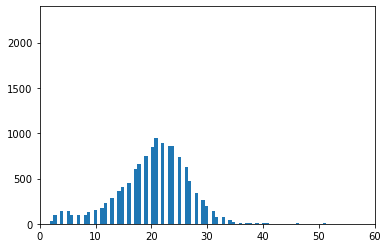

In [501]:
plt.hist([len(x) for x in cleaned_sentences], bins= 'auto')
plt.axis([0, 60, 0, 2400])
plt.show()

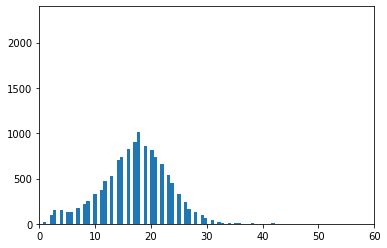

In [201]:
plt.hist([len(x) for x in cleaned_sentences], bins= 'auto')
plt.axis([0, 60, 0, 2400])
plt.show()

In [220]:
from scipy.stats import skewnorm
a=0
data = skewnorm.rvs(a, size=1000)

data = [int(x + 20) for x  in data]

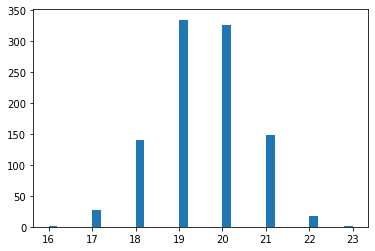

In [529]:
plt.hist(data, bins= 'auto')
#plt.axis([0, 60, 0, 2400])
plt.show()

In [508]:
import seaborn as sns
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

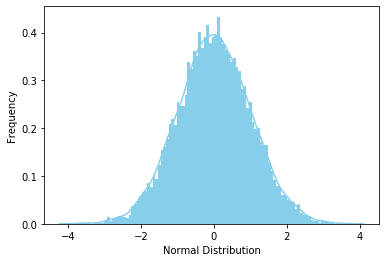

In [509]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [32]:
# GENERATE TRAINING DATA


def replace_str_index(text,index=0,replacement=''):
    return '%s%s%s'%(text[:index],replacement,text[index+1:])

def clean(sentence):
    
    text = sub(r'\s+', ' ', sentence).strip().lower()
    
    #replace "й"
    try:
        index_ = text.index('й'[1]) - 1
        text = text.replace('й'[1], '')
        text = replace_str_index(text, index_, 'й')
    except:
        pass

    #replace "ё"
    try:
        index_ = text.index('ё'[1]) - 1
        text = text.replace('ё'[1], '')
        text = replace_str_index(text, index_, 'ё')
    except:
        pass
    
    text = re.sub('[ó]', 'о', text)
    text = re.sub(r'[+\(]?[0-9][0-9 .\-\(\)]{4,15}[0-9]', ' ', text)
    #text = re.sub('[^""«»а-яА-ЯA-Za-z0-9 ]+', ' ', text)    
    text = sub(r'\s+', ' ', text).strip().lower()
    text = sub('[ё]', 'е', text)
    return text

def clean_fio(sentence):
    
    text = sub(r'\s+', ' ', sentence).strip().lower()
    
    #replace "й"
    try:
        index_ = text.index('й'[1]) - 1
        text = text.replace('й'[1], '')
        text = replace_str_index(text, index_, 'й')
    except:
        pass

    #replace "ё"
    try:
        index_ = text.index('ё'[1]) - 1
        text = text.replace('ё'[1], '')
        text = replace_str_index(text, index_, 'ё')
    except:
        pass
    
    text = re.sub('[ó]', 'о', text)
    text = re.sub(r'[+\(]?[0-9][0-9 .\-\(\)]{4,15}[0-9]', ' ', text)
    text = re.sub('[^.а-яА-ЯA-Za-z ]+', ' ', text)
    text = sub(r'\s+', ' ', text).strip().lower()
    text = pytils.translit.detranslify(text)
    text = re.sub('[ё]', 'е', text)
    return text

In [33]:
df_per_org_loc = pd.read_excel('fio_lpu_adr_from_base_1.xlsx', 'PER')
df_per_org_loc = df_per_org_loc.fillna('')

In [34]:
df_per_org_loc['PER'] = df_per_org_loc['PER'].apply(lambda x: clean_fio(x))

In [35]:
####
#df_per_org_loc.to_excel('per_delete_duplicates.xlsx')

In [36]:
df_per_org_loc

,PER
0,кочарян ширяева зенина елизавета александровна
1,магомедгаджиев магомедганипа ибрагимгаджиевич
2,джалилова таривердиева эльмира гадживердиевна
3,архангельский багдасарьянц дмитрий эдуардович
4,парцваниа виноградова екатерина владимировна
...,...
820615,кондратьева
820616,артурович
820617,калашникова
820618,степан


In [37]:
PER_labeled = []

for s in df_per_org_loc['PER']:
    splt = [x for x in re.split('(\W)', s) if x != '' and x != ' ' and x != '\xa0']
    person_labeling = ['B-PER'] + ['I-PER'] * (len(splt) - 1)
    PER_labeled.append((splt, person_labeling))

In [38]:
PER_labeled[120000]

(['петунин', 'алексей', 'владимирович'], ['B-PER', 'I-PER', 'I-PER'])

In [39]:
df_ORG = pd.read_excel('fio_lpu_adr_from_base_1.xlsx', 'ORG')
df_ORG['ORG'] = df_ORG['ORG'].apply(lambda x: clean(x))

In [40]:
df_ORG

,ORG
0,# 1
1,# 2
2,# 51 городская клиническая больница
3,# 6 городская больница
4,# 6 городская больница детское поликлиническое...
...,...
71698,узд
71699,узд
71700,узд
71701,узд


In [41]:
ORG_labeled = []

for s in df_ORG['ORG']:
    splt = [x for x in re.split('(\W)', s) if x != '' and x != ' ' and x != '\xa0']
    organisation_labeling = ['B-ORG'] + ['I-ORG'] * (len(splt) - 1)
    ORG_labeled.append((splt, organisation_labeling))

In [42]:
ORG_labeled[70000]

(['aquastom'], ['B-ORG'])

In [43]:
df_LOC = pd.read_excel('fio_lpu_adr_from_base_1.xlsx', 'LOC_splitted')
df_LOC = df_LOC.dropna()
df_LOC['LOC'] = df_LOC['LOC'].apply(lambda x: clean(x))

In [44]:
df_LOC

,LOC
0,поселок
1,москва
2,красноярск
3,россия
4,саратов
...,...
344434,курильск
344435,верхоянск
344436,высоцк
344437,чекалин


In [45]:
LOC_labeled = []

for s in df_LOC['LOC']:
    splt = [x for x in re.split('(\W)', s) if x != '' and x != ' ' and x != '\xa0']
    location_labeling = ['B-LOC'] + ['I-LOC'] * (len(splt) - 1)
    LOC_labeled.append((splt, location_labeling))

In [46]:
LOC_labeled[6000]

(['казань'], ['B-LOC'])

In [47]:
no_entity_labeling = ['O'] * len(cleaned_sentences[10])

In [48]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [49]:
list(zip(list(chunks(cleaned_sentences[10], 4)), list(chunks(no_entity_labeling, 4))))

[(['сашафабер', 'блогер', 'выходного', 'дня'], ['O', 'O', 'O', 'O']),
 (['пишу', 'для', 'девочек', 'в'], ['O', 'O', 'O', 'O']),
 (['сторис', 'отзывы', 'о', 'косметике'], ['O', 'O', 'O', 'O']),
 (['промокоды', 'скидки', 'саморазвитие', 'бухгалтер'], ['O', 'O', 'O', 'O']),
 (['сф', 'бизнес', 'хттпс', 'фаберлиc'], ['O', 'O', 'O', 'O']),
 (['cом', 'регистер', 'спонсорнумбер', 'ру'], ['O', 'O', 'O', 'O'])]

In [50]:
import random

O_labeled = []


for s in cleaned_sentences:
    
    random_number = random.uniform(1,100)
    
    if random_number > 80:
        s = s + ['к', 'м', 'н', 'массаге', 'ливе', 'творец', 'ибн', 'сина', 'д', 'м', 'н', 'тел', 'теам', 'мембер', 'тетахилинг', 'салес', 'идеас', 'украина']
    
    no_entity_labeling = ['O'] * len(s)
    
    chunks_ = list(zip(list(chunks(s, 3)), list(chunks(no_entity_labeling, 3))))
    
    for cnk in chunks_:
        O_labeled.append(cnk)


In [51]:
len(cleaned_sentences)

12419

In [52]:
O_labeled[42]

(['узи', 'хттп', 'ру'], ['O', 'O', 'O'])

In [53]:
len(O_labeled)

89664

In [54]:
O_labeled = O_labeled * 8

In [55]:
len(O_labeled)

717312

In [56]:
TRAIN_data = O_labeled + LOC_labeled + ORG_labeled + PER_labeled

In [57]:
len(TRAIN_data)

1954066

In [58]:
import random
TRAIN_data = random.sample(TRAIN_data, len(TRAIN_data))

In [59]:
TRAIN_data[58]

(['имплантация', 'есть', 'вопросы'], ['O', 'O', 'O'])

In [193]:
((754171/100000)*4)/24

1.2569516666666667

In [60]:
len_tota_data = len(TRAIN_data)
len_tota_data

1954066

In [2]:
100/4176587*100000

2.394299460300959

In [61]:
#train data
len_train_data = int(len_tota_data/100*70) # 90 percent of total data
len_train_data

1367846

In [64]:
len_validation_data = int(len_tota_data/100*15) # 8 percent of total data
len_validation_data

293109

In [10]:
len_test_data = int(1820623/100*2) + 1 # 2 percent of total data + one entity to make a whole number
len_test_data

36413

In [12]:
len_total_data_1 = len_train_data + len_validation_data + len_test_data
assert len_tota_data == len_total_data_1
print(len_total_data_1)

1820623


In [13]:
len_total_data_1, len_tota_data

(1820623, 1820623)

In [205]:
len_train_data / 100000 # 16 parts to train (+ 0.02148)

16.02148

In [1]:
TRAIN_data[0]

NameError: name 'TRAIN_data' is not defined

In [117]:
import pickle

with open('TRAIN_data.pkl' , 'wb') as fo:
    pickle.dump(TRAIN_data, fo)

In [2]:
import pickle
with open('TRAIN_data.pkl', 'rb') as fo:
    TRAIN_data = pickle.load(fo)

In [193]:
count = 0

with open(f'valid.txt', 'w') as fo:
    for i in TRAIN_data[0:]:

        if count > 20:
            fo.write(f'\n')
            count = 0

        for x,y in zip(i[0], i[1]):



            fo.write(f'{x} {y}\n')
            count += 1

In [261]:
# train data generation
o = 0
z = 100000

for bz in range(1, 19):
    


    count = 0
    with open(f'train_{bz}.txt', 'w') as fo:
        for i in TRAIN_data[0:len_train_data][o:z]:

            if count > 20:
                fo.write(f'\n')
                count = 0

            for x,y in zip(i[0], i[1]):



                fo.write(f'{x} {y}\n')
                count += 1
    o += 100000
    z += 100000

In [262]:
len_train_data

1602148

In [111]:
import psutil

In [129]:
psutil.cpu_percent()

19.7

In [94]:
1413430 + 302877

1716307

In [85]:
random.randint(0,9)

2

In [316]:
1660955 + 10000

1670955

In [317]:
#test/validation data generation

count = 0
with open(f'test.txt', 'w') as fo:
    for i in TRAIN_data[1660955:1670955]:
        
        random_ = int(np.random.normal(20,6))

        if count > random_:
            fo.write(f'\n')
            count = 0

        for x,y in zip(i[0], i[1]):



            fo.write(f'{x} {y}\n')
            count += 1

In [130]:
500000/100*10

50000.0

In [240]:
188757.2 + 188757.2 + 1510057.6

1887572.0

In [241]:
1510057.6 / 15

100670.50666666667

In [375]:
(((15 + (12 / 60)) * 1887591 / 2400) / 60) / 24

8.301904861111112

In [60]:
1185881/100*90

1067292.9

In [66]:
1067292 + 59294

1126586

In [61]:
1185881/100*5

59294.049999999996

In [62]:
1185881/100*5

59294.049999999996

In [165]:
for i,k,v in words_to_investigate:
    if i < 6:
        for z in prepared_for_ner:
            if any(x for x in z.split(' ') if x == v):
                print(z)
                print('==', v, '==')
                print('________________________________________________________________________________')
        

карамyшева.марина др.марина cергеевна врач стоматолог терапевт детский стоматолог
== cергеевна ==
________________________________________________________________________________
хирург.панаетов пластическии хирург москва панаетов а.п. консультация абдоминопластика блефаропластика маммопластика липосакция ринопластика феи слифтинг цены хттпс хирург панаетов.ру пластическая хирургия ценy
== а.п. ==
________________________________________________________________________________
др.ангеллааас пластический хирург нск аас анжелла анатольевна руководитель клиники холлywоод аастудио ведущий пластический хирург все виды операций запись на консультацию хттпс wа.ме
== аас ==
________________________________________________________________________________
гинеколог акбермет акушер гинеколог г. москва чербекова акбермет абдиллаевна тел w п каждый день с до запись на прием хттп wа.ме
== абдиллаевна ==
________________________________________________________________________________
шаxзод абдушукур

волберг.ортхо ортходонтист ангелика волберг врач ортодонт член профессионального общества ортодонтов россии г. москва личныи профиль мосангелес ежедневник ортодонта ортхобоок
== ангелика ==
________________________________________________________________________________
велирамусиc певица блогер велира ангельский голос пишу песни сама песнистихи еще пока пою каверы певиcа но уже выступаю как артист премьера клипа лифе хттпс ёуту.бе y у те трк
== ангельский ==
________________________________________________________________________________
андруxа ру андруxа ру личный аккаунт врача остеопата андрея александровича массагеспб санкт петербург . . . вс о здоровье здесь хттп инстаграм.cом остеомедпро
== андрея ==
________________________________________________________________________________
др.антипенкова ортодонт красноярск антипенкова елена юрьевна клиника мира
== антипенкова ==
________________________________________________________________________________
диамант ант врач терапевт мос

баснаевусеин хирург симферополь баснаев усеин ибрагимович хирург кандидат медицинских наук доцент кафедры медицинскои академии им.с.и.георгиевского хттпс таплинк.cc баснаевусеин
== баснаев ==
________________________________________________________________________________
др.батаалиев батаалиев г. б. врач узи врач уролог хттп апи.wхацапп.cом сенд пхоне
== батаалиев ==
________________________________________________________________________________
девичии врачи между нами девочками доктор шток и доктор батюшина два врача гинеколога. пишем о том что действительно волнует каждую женщину.
== батюшина ==
________________________________________________________________________________
др.баштоваявалерy ортодонт баштовая валерия ортодонт симферополь консультации комплексная диагностика исправление прикуса аппаратами и брекет системами
== баштовая ==
________________________________________________________________________________
кхирург движение пластическии хирург волгоград рязанцев игорь ю

неwпавловмд пластический хирург в.в павлов преподаватель кафедры доцент практика с г кандидат мед наук спб москва wа вбр краснодар
== в.в ==
________________________________________________________________________________
дрстуденянская студенянская в.с. врач гинеколог специалист по эстетической гинекологии дорожная клиническая больница мечникова статус грация большевиков к wапп хттпс апи.wхацапп.cом сенд пхоне
== в.с. ==
________________________________________________________________________________
урологвагаев уролог ульяновск вагаев владимир дмитриевич ульяновская областная больница мц консилиум ул. водопроводная дом лечу женщин и мужчин .
== вагаев ==
________________________________________________________________________________
доcтор.еcо репродуктолог л москва юрматова наргис валиджановна врач гинеколог репродуктолог к.м.н проведение эко лечение всех видов бесплодия отвечаю на вопросы в диреcт хттпс лифе репродуcтион.ру
== валиджановна ==
_____________________________________

доc рабаданов уролог врач врач узд рабаданов гапиз саидович фриланс ултра урологy истина где то рядом
== гапиз ==
________________________________________________________________________________
др.гуликян пластическии хирург гуликян гарен нораирович к.м.н. медицина образ жизни красноярск хттп таплинк.cc др.гуликян
== гарен ==
________________________________________________________________________________
гарyянов.ра роман гарьянов врач уролог
== гарьянов ==
________________________________________________________________________________
ди гyнеcологист гинеколог узи москва краснодар мусаева диана гасратовна ильясова за доказательную гинекологию запись на прие м и онлаи н не придумываю болезни не лечу норму хттпс таплинк.cc ди гyнеcологист
== гасратовна ==
________________________________________________________________________________
др гауер пластическии хирург москва гауэр любовь николаевна к.м.н. стаж работы лет более к успешных операций любовь в каждом преображении запишись на б

др.даниелова ортодонт брекеты москва даниелова белла знаю все о голливудской улыбке жонглирую брекетами исправляю прикусы с лет для бесплатной консультации жмите хттпс апи.wхацапп.cом сенд пхоне
== даниелова ==
________________________________________________________________________________
ст даниел дентал cлиниc клиника святого даниила имплантация зубов виниры коронки брекеты челюстно лицевая хирургия м. тульская хттп стданиил.ру
== даниила ==
________________________________________________________________________________
доcтор.пургина врач гастроэнтеролог спб пургина даниэла сергеевна лечу взрослых и детей при м в q cлиниc и лахтаковенскиy директ закрыт вся информация о консультациях хттпс таплинк.cc доcтор.пургина
== даниэла ==
________________________________________________________________________________
дарине био эко логия
== дарине ==
________________________________________________________________________________
др.закарин кардиолог кардиохирург закарин алмас дауренбекови

томичкатомск стоматолог краснова е.в лечение протезирование проф.гигиена реставрация виниринг кузнецова хттпс апи.wхацапп.cом сенд пхоне
== е.в ==
________________________________________________________________________________
межидов казбек султанович межидов гл. врач рдкб им. е.п. глинки к.м.н. председатель правления чроо медицинская палата главныи педиатр скфо
== е.п. ==
________________________________________________________________________________
wелл cлиниc ростов стоматология баранова е.с. лечение имплантация зубов протезирование брекеты детская стоматология отбеливание бесплатная консультация рассрочка без хттпс wелл cлиниc.ру
== е.с. ==
________________________________________________________________________________
кожевников евгени травматолог барнаул мц гарант хирургия новообразовании кожи врач травматолог ортопед врач криолог
== евгени ==
________________________________________________________________________________
др махитаров руководитель др. вита ростов он дон вра

нюта о анна симачева врач акушер гинеколог специалист по эстетической гинекологии мама крошки зю москва юзао
== зю ==
________________________________________________________________________________
доcторпластик пластический хирург кунпан и.а доктор медицинских наук профессор лет стажа все виды пластических операций клиника золотое сечение хттп www.руспластика.ру
== и.а ==
________________________________________________________________________________
климова ортхо ортодонт оренбург климова и.в. климова инна владимировна исправление прикуса взрослым и детям стоматология жемчужина запись по телефону
== и.в. ==
________________________________________________________________________________
доcторафанасев онкогинеколог афанасьев м.с. профессор мгму и.м сеченова сохраняю женское репродуктивное здоровье методом фдт без операции и удаления . инфо хттпс таплинк.cc доcторафанасев
== и.м ==
________________________________________________________________________________
герасимовуролог антон

пулмо доcтор пульмонолог спб гатчина кимбат куаншбаевна блог о пульмонологии здесь вы найдете полезную и достоверную информацию прием
== кимбат ==
________________________________________________________________________________
зубастик стоматология зубастик стоматология для детей и взрослых г. кинель пос. елшняги ул. транзитная в тел. время работы с до
== кинель ==
________________________________________________________________________________
дентал wоркшоп денталwоркшоп уникальное пространство для проведения лекций мастер классов и курсов по стоматологии. энергия и эргономика. аренда хттпс денталwоркшоп.про
== классов ==
________________________________________________________________________________
дркнак стоматология сwисс тек дентал кнак кирилл алексеевич главный врач стоматологической клиники сwисс тек дентал виниры импланты лечение зубов любой сложности хирургия. хттп стдент.ру
== кнак ==
________________________________________________________________________________
лиа кня

KeyboardInterrupt: 

In [29]:
with open('words_to_investigate.txt', 'w') as fo:
    fo.write('per_count\tinst_count\tword\n')
    for i,k,m in words_to_investigate:
        fo.write(f'{i}\t{k}\t{m}\n')

In [266]:
df_validation_pavlov = pd.read_excel('df_model_validation_01.xlsx')

df_validation_pavlov = df_validation_pavlov.fillna('')
df_validation_pavlov['Names_pavlov'] = df_validation_pavlov['Names_pavlov'].apply(lambda x: sub(r'\s+', ' ', sub('[^а-яА-ЯA-Za-z ]+', ' ', x).strip()))
df_validation_pavlov['Correct'] = df_validation_pavlov['Correct'].apply(lambda x: sub(r'\s+', ' ', sub('[^а-яА-ЯA-Za-z ]+', ' ', x).strip()))

df_validation_pavlov['Names_pavlov'] = df_validation_pavlov['Names_pavlov'].apply(lambda x: set(x.split(' ')))
df_validation_pavlov['Correct'] = df_validation_pavlov['Correct'].apply(lambda x: set(x.split(' ')))
#df_validation_pavlov['text_bow'] = df_validation_pavlov['text_bow'].apply(lambda x: set(x.split(' ')))

# total observations
all_observations = sum([len(df_validation_pavlov['Correct'][i]) for i in range(1000)])

# Deeppavlov NER model
true_positives_p = sum([len(df_validation_pavlov['Correct'][i] & df_validation_pavlov['Names_pavlov'][i]) for i in range(1000)])
false_positives_p = sum([0 if df_validation_pavlov['Names_pavlov'][i] - df_validation_pavlov['Correct'][i] == {''} else len(df_validation_pavlov['Names_pavlov'][i] - df_validation_pavlov['Correct'][i]) for i in range(1000)])
false_negatives_p = sum([0 if df_validation_pavlov['Correct'][i] - df_validation_pavlov['Names_pavlov'][i] == {''} else len(df_validation_pavlov['Correct'][i] - df_validation_pavlov['Names_pavlov'][i]) for i in range(1000)])
accuracy_p = true_positives_p / all_observations
#accuracy_old = true_positives_p/(true_positives_p + false_positives_p + false_negatives_p)
precision_p = true_positives_p / (true_positives_p + false_positives_p)
recall_p = true_positives_p / (true_positives_p + false_negatives_p)
f1_score_p = 2 * precision_p * recall_p / (recall_p + precision_p)
print('TP: ', true_positives_p)
print('FP: ', false_positives_p)
print('FN: ', false_negatives_p)
print('Accuracy: ', accuracy_p)
print('Precision: ', precision_p)
print('Recall: ', recall_p)
print('f1_score: ', f1_score_p)

TP:  1521
FP:  439
FN:  138
Accuracy:  0.8863636363636364
Precision:  0.7760204081632653
Recall:  0.9168173598553345
f1_score:  0.8405636916275214
